In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
len(os.listdir('pizza_steak/train/pizza'))

In [ ]:
TRAIN_PATH ='pizza_steak/train/'
TEST_PATH ='pizza_steak/test/'

In [ ]:
os.path.basename(TEST_PATH + 'pizza')

'pizza'

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def plot_image(image_path):

  plt.figure(figsize=(20,9))

  for i in range(6):
  
    plt.subplot(2,3,i+1)
    class_val = random.choice(['pizza', 'steak'])

    base_path = image_path + class_val
    all_images = os.listdir(base_path)

    random_img = os.path.join(base_path, random.choice(all_images))
    base_class = os.path.basename(random_img)
    img = mpimg.imread(random_img)
    plt.axis(False)
    plt.title(f'image of {class_val}, shape:{img.shape}')
    plt.tight_layout()
    plt.imshow(img)
  plt.show()

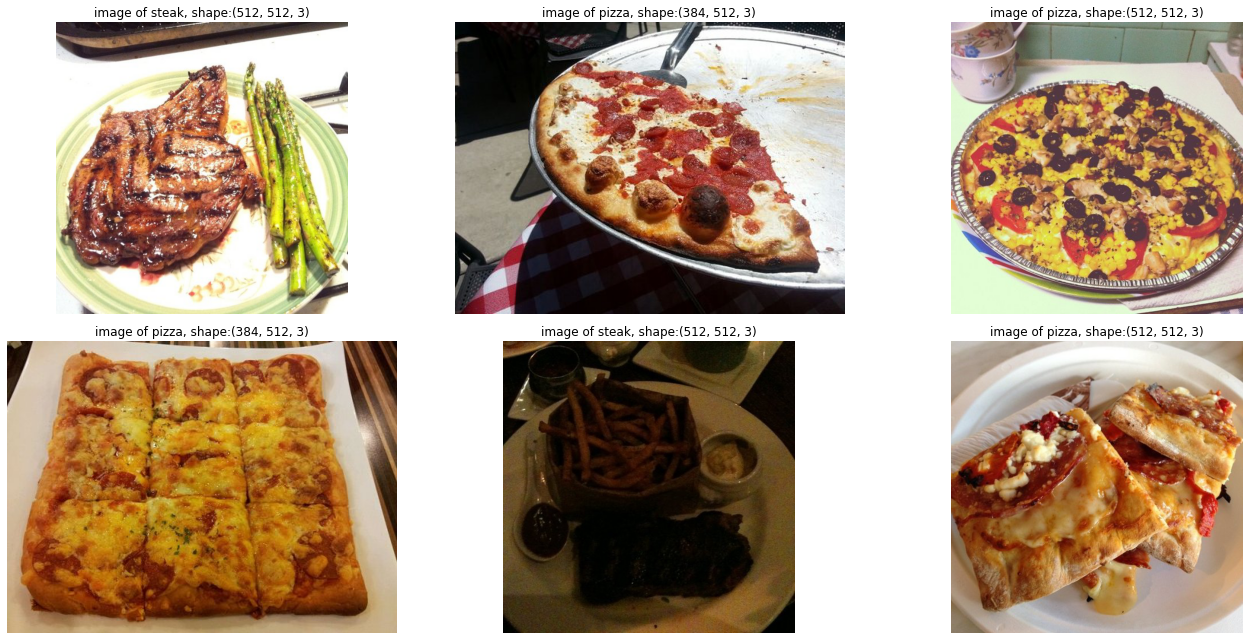

In [ ]:
plot_image(TRAIN_PATH)

In [ ]:
# preprocess our data for the architectutre 
# load out images
# build CNN pattern to find our images
# compile our CNN
# fit CNN to training data

In [ ]:
from warnings import filters
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed 
tf.random.set_seed(42)

# preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# import data from repo and turn to batches
train_data = train_datagen.flow_from_directory(
    directory=TRAIN_PATH, batch_size=32, target_size=(224,224),
    class_mode='binary', seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=TEST_PATH, batch_size=32, target_size=(224,224),
    class_mode='binary', seed=42
)

# build CNN architecture
model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters=10,
                                   kernel_size=3,
                                   activation='relu',
                                   input_shape=(224,224,3)),
                             
          tf.keras.layers.Conv2D(filters=10,
                                 kernel_size=3,activation='relu'),
                             
          tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

          tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                                 activation='relu'), 
                             
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, 
                                 activation='relu'),
                             
          tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# # fit model
history = model.fit(train_data, epochs=5, 
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 222ms/step - loss: 0.5705 - accuracy: 0.6833 - val_loss: 0.4015 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4173 - accuracy: 0.8147 - val_loss: 0.3594 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3638 - accuracy: 0.8400 - val_loss: 0.3135 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3467 - accuracy: 0.8527 - val_loss: 0.2976 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3081 - accuracy: 0.8733 - val_loss: 0.2842 - val_accuracy: 0.8820


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# use same model for different 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# use tf playground architecture
tf.random.set_seed(42)


# preprocess our data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# import data from repo and turn to batches
train_data = train_datagen.flow_from_directory(
    directory=TRAIN_PATH, batch_size=32, target_size=(224,224),
    class_mode='binary', seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory=TEST_PATH, batch_size=32, target_size=(224,224),
    class_mode='binary', seed=42
)


# architecture 
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224,224,3)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

history = model.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data)
                    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 2.1858 - accuracy: 0.6347 - val_loss: 0.6032 - val_accuracy: 0.7520
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.9676 - accuracy: 0.6993 - val_loss: 0.4710 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7488 - accuracy: 0.7140 - val_loss: 1.5531 - val_accuracy: 0.5300
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6040 - accuracy: 0.7513 - val_loss: 0.4980 - val_accuracy: 0.7420
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4604 - accuracy: 0.7860 - val_loss: 0.4827 - val_accuracy: 0.7660
